# GAN이란? 

GAN, Generative Adversarial Networks란 이미지 생성을 목적으로 하는 딥러닝 방식으로, Generator를 이용해서 실제와 가까운 가짜 데이터를 만들어 내는 것을 목표로 한다.
<br>
<br>
더 나아가 가짜 데이터 뿐만 아니라, 실제 데이터를 기반으로 한 조작된 이미지나 영상(마스크 씌우기, 딥페이크 등)을 생성하기도 한다.

## GAN 예시

GAN의 구조에 대해 알아보기 전에 GAN을 직관적으로 이해할 수 있는 예시를 한 번 보자.

<img src="https://t1.daumcdn.net/cfile/tistory/9928E6375B75872D17" alt="Alternative text" style="width:400px;" />

GAN은 위조지폐를 만드는 범인과, 위조지폐를 검수하는 경찰로 이루어진 모델이라고 할 수 있다.
<br><br>
범인의 목표는 경찰이 걸러내지 못할 정교한 위조지폐를 만드는 것이 목적이고, 경찰의 목적은 모든 위조지폐를 걸러낼 수 있는 정교한 검수 기술을 만드는 것이 목적이다.
<br><br>
시간(학습 epoch)이 지날 수록 범인은 검수된 위조지폐의 오류를 토대로 더 정교한 위조지폐를 만들 것이고, 경찰은 진짜인줄 알았는데 나중에 알고보니 위조지폐였던 사건을 토대로 더 정교한 기술을 만들 것이다.
<br>
<br>
**하지만 최종적으로 우리가 원하는 것은 경찰이 아닌 범인이다.**
<br><br>
GAN은 이렇듯 생성 모델과 검수 모델 두 모델을 합친 방식으로, 양쪽 모두를 학습을 시키면서 정교한 생성모델을 만들어내는 것을 목표로 한다.

## GAN 구조

<img src="https://developers.google.com/static/machine-learning/gan/images/gan_diagram.svg?hl=ko" alt="Alternative text" style="width:400px;" />

기본적인 GAN은 예시를 들었듯 이미지를 생성하는 Generator와 실제 이미지와 가짜 이미지를 구분하는 Discriminator로 구성된다.
<br><br>
Generator는 랜덤한 값인 노이즈를 토대로 노이즈에 맞는 랜덤 이미지를 생성한다. 생성된 이미지는 실제 이미지와 함께 Discriminator로 입력되고 Discriminator의 분류에 따라 Generator loss가 결정된다.


<img src="https://developers.google.com/static/machine-learning/gan/images/gan_diagram_generator.svg?hl=ko" alt="Alternative text" style="width:400px;" />

생성된 Generator는 위의 사진처럼 역전파가 수행되며 각각의 가중치가 갱신된다. 이때, Discriminator의 가중치는 연산과정에서 사용되지만, 가중치 갱신에서는 사용되지 않는다. 즉, Discrminator의 가중치는 Generator의 학습 과정동안 고정된다.

<img src="https://developers.google.com/static/machine-learning/gan/images/gan_diagram_discriminator.svg?hl=ko" alt="Alternative text" style="width:400px;" />

Discriminator의 학습은 Generator의 이미지와 실제 이미지를 분류할 때 생기는 loss를 통해서 학습하는데, 역전파의 과정은 CNN에서의 역전파와 동일하다. 이때, Generator까지 역전파가 흐르는 게 아닌 오직 Discriminator의 가중치만 갱신된다.
<br>
즉, Discriminator의 학습 동안은 Generator의 가중치는 고정된다.
<br><br>
이처럼 Generator와 Discriminator는 서로 돌아가면서 학습을 진행하며 발전된다.

<img src="https://images.squarespace-cdn.com/content/v1/5c1828d7c258b4d2ab69b7d7/1558277200599-5LP5V7W9V0CACTAJY9SP/Figure+1.jpg?format=1000w" alt="Alternative text" style="width:400px;" />

모듈의 구조를 살펴보면 Discriminator는 우리가 익히 보는 CNN의 구조이지만, Generator의 구조는 크기가 커지는 "CNN의 역순"처럼 보이는 구조를 띄고 있다.
<br>
이는 DCGAN이라는 GAN을 발전시킨 새로운 GAN으로 CNN 대신 ConvTranspose2d를 사용해 output의 크기를 키운다.
<br>
<br>
하지만 이번 시간에는 GAN의 기본적인 이해를 돕기 위해 DNN을 이용한 GAN을 공부하자.


## GAN의 학습

### GAN의 학습 과정

위에 썼듯이 Discriminator와 Generator는 일정 Epoch을 단위로 한쪽 모델을 학습시킬 때는 다른 쪽의 구조를 고정한채로 학습을 수행해서 인공지능이 안정적으로 학습할 수 있도록 유도한다.

문제는 학습이 충분히 지났을 때 이루어진다면 문제가 발생하는데, 바로 Generator가 지나치게 똑똑해진다는 것이다. Generator가 실제를 충분히 모방하기 시작했을 때부터 Discriminator는 필연적으로 50%의 확률로만 정답을 맞출 수 있다. 즉 더이상 학습하는 의미가 줄어든다.
<br><br>
즉 Generator는 에폭이 줄어들 수록 유의미한 피드백을 받을 확률이 줄어들고 더 나아가 능력에 부정적인 피드백을 받을 확률이 더 늘어나, 부정적인 오버피팅이 일어날 수 있다.

### GAN의 Loss Function

GAN은 실제 사진의 feature분포(공간, 색 등)의 확률분포를 모방하려고 하며, 과정에서 Generator와 Discriminator의 두 모델을 사용한다. 그렇기에 GAN은 기존에 있던 CrossEntropy등의 Loss Function과는 다른 함수를 필요로 한다. 그래서 GAN은 Generator와 Discriminator를 연산에 포함하는 새로운 Loss Function을 정의한다.

<img src="https://velog.velcdn.com/images%2Fhyebbly%2Fpost%2Fa6e590a2-92a6-4bde-8e10-70daf3103849%2Fimage.png" alt="Alternative text" style="width:400px;" />

식에 대해서 자세하게 들어가기보다는 천천히 식이 무엇을 의도하는지만 간단히 하고 넘어가자. 궁금한 사람은 밑에 논문 링크나 인터넷 해설을 찾아보자
<br><br>
https://arxiv.org/pdf/1406.2661.pdf

minmax V(D,G)는 V(D,G)라는 Value Function에 대해서 D모델은 해당 함수의 값을 최대로 만드려 하고, G라는 모델은 최소화 해야한다는 것이다. Loss Function이라는 측면에서 이 함수는 G를 초점으로 고안된 함수라는 것을 알 수 있다.

이제 왼쪽의 식을 보자. x는 준비된 데이터셋 안에 있는 실제 이미지들을 의미하고, z는 노이즈, G(z)는 노이즈를 토대로 만들어낸 가짜 이미지이다.
<br>
D(X)는 X가 진짜 이미지라고 Discriminator가 예측할 확률이다. 즉, D(G(z))는 Discriminator가 속을 확률이라는 의미이다.
<br><br>
이제 식을 다시 보자. 해당 함수가 최대가 되기 위해서는 Discrimiator 즉 D는 x에 대해서 1로, 항상 참이라고 예측해야하고 G(z)에 대해서는 항상 거짓이라고 예측해야한다.
<br>
또, 해당 함수가 최소가 되기 위해서는 Generator가 오히려 x를 뛰어넘어 항상 D가 G(z)에 대해서 참이라고 설정하도록 유도해야한다.
<br><br>
이처럼 GAN은 두 모델이 서로 Loss function을 다른 방향으로 변하게 하는 것을 목표로 잡도록 해 서로 적대하도록(adversarial) 만들어 학습을 유도하는 것이다.

## GAN 실습해보기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
print(is_cuda)
device = torch.device('cuda' if is_cuda else 'cpu')

True


이번 실습은 MNIST 데이터를 모방하는 생성자를 만드는 것을 목표로 한다. 먼저 데이터셋을 다운 받자.

In [ ]:
# standardization code
transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize(mean=(0.5),   # 3 for RGB channels이나 실제론 gray scale
                                         std=(0.5))])  # 3 for RGB channels이나 실제론 gray scale

# MNIST dataset
train_data = dsets.MNIST(root='data/', train=True, transform=transform, download=True)
test_data  = dsets.MNIST(root='data/', train=False, transform=transform, download=True)


batch_size = 200
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True)
test_data_loader  = torch.utils.data.DataLoader(test_data, batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



torch.Size([1, 28, 28])
3


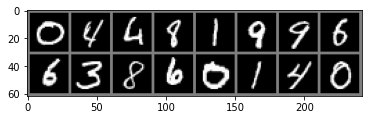

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def imshow(img):
    img = (img+1)/2    
    img = img.squeeze()
    np_img = img.numpy()
    plt.imshow(np_img, cmap='gray')
    plt.show()

def imshow_grid(img):
    img = utils.make_grid(img.cpu().detach())
    img = (img+1)/2
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

example_mini_batch_img, example_mini_batch_label  = next(iter(train_data_loader))
print(example_mini_batch_img[0].shape)
print(example_mini_batch_img[0].dim())
imshow_grid(example_mini_batch_img[0:16,:,:])


이제, 랜덤한 노이즈에 따라 각각 다른 MNIST 숫자 이미지를 출력하는 생성자 모델을 정의하자.

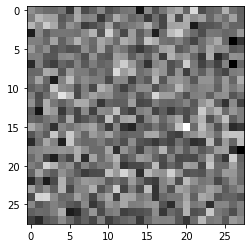

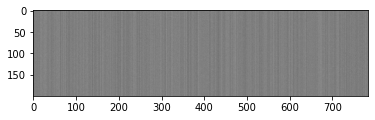

tensor([[ 0.0205, -0.0005,  0.0322,  ..., -0.0070,  0.0016, -0.0016],
        [ 0.0313,  0.0095,  0.0189,  ..., -0.0616, -0.0246,  0.0172],
        [ 0.0181,  0.0134,  0.0308,  ..., -0.0465,  0.0196, -0.0533],
        ...,
        [-0.0222, -0.0491, -0.0058,  ..., -0.0411, -0.0006,  0.0162],
        [-0.0406, -0.0412, -0.0085,  ...,  0.0033, -0.0077, -0.0345],
        [ 0.0259,  0.0228,  0.0351,  ...,  0.0145,  0.0712, -0.0263]],
       device='cuda:0', grad_fn=<TanhBackward0>)


In [ ]:
from torchsummary import summary as summary_

def sample_z(batch_size = 1, d_noise=100, device='cuda'):
    return torch.randn(batch_size, d_noise, device=device)




class G_Linear(nn.Module):
  def __init__(self, d_noise):
    super(G_Linear, self).__init__()


    self.model = nn.Sequential(
      nn.Linear(d_noise, 256),
      nn.BatchNorm1d(256),
      nn.LeakyReLU(0.2),
      nn.Linear(256,512),
      nn.BatchNorm1d(512),
      nn.LeakyReLU(0.2),
      nn.Linear(512,512),
      nn.BatchNorm1d(512),
      nn.LeakyReLU(0.2),
      nn.Linear(512, 28*28),
      nn.Tanh()
    )
    
  def forward(self, z):

      img = self.model(z)
      return img

 

# 모델 생성하기
g_linear = G_Linear(100).cuda()
# 노이즈 생성하기
z = sample_z().cuda()


# 가짜 이미지 생성하기
with torch.no_grad():
  g_linear.eval()
  img_fake = g_linear(z).view(-1,28,28)
# 이미지 출력하기
imshow(img_fake.squeeze().cpu().detach())

z = sample_z(200)
img_fake = g_linear(z)
imshow_grid(img_fake)

print(img_fake)


아직 학습이 수행되지 않아 구별할 수 없는 노이즈만 존재하는 것을 확인할 수 있다.
<br>
하지만 이후에 학습을 수행한 뒤 어떻게 변경되는지 확인해보자.

이제, 분류를 수행할 판별자를 정의하자.

In [ ]:
class D_Linear(nn.Module):
    def __init__(self):
        super(D_Linear, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, img):
        validity = self.model(img)
        return validity

d_linear = D_Linear()
d_linear

D_Linear(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

판별자는 오직 진짜, 가짜 판별만을 수행하므로 loss function은 BCE로 정의하자.

In [ ]:
# Loss function
adversarial_loss = torch.nn.BCELoss()

# Initialize generator and discriminator
generator = G_Linear(100)
discriminator = D_Linear()

print(device)


generator.cuda()
discriminator.cuda()
adversarial_loss.cuda()

# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), 
                               lr=0.0005)
optimizer_D = torch.optim.Adam(discriminator.parameters(), 
                               lr=0.0005)

cuda


한 에폭에서 mini_batch별로 Discriminator를 학습하고 다음 Generator를 학습하는 것을 볼 수 있다.

In [ ]:
criterion = nn.BCELoss()
d_noise=100

def run_epoch(generator, discriminator, _optimizer_g, _optimizer_d):

    generator.train()
    discriminator.train()

    for img_batch, label_batch in train_data_loader:

        img_batch, label_batch = img_batch.to(device), label_batch.to(device)

        # ================================================  #
        # maximize V(discriminator,generator) = optimize discriminator (setting k to be 1)  #
        # ================================================  #

        # init optimizer
        _optimizer_d.zero_grad()

        p_real = discriminator(img_batch.view(-1, 28*28))

        z = torch.randn(batch_size, 100).to(device)
        p_fake = discriminator(generator(z))


        # ================================================  #
        #     Loss computation (based on Cross Entropy)     #
        # ================================================  #
        loss_d = criterion(p_real, torch.ones_like(p_real).to(device)) + \
                  criterion(p_fake, torch.zeros_like(p_real).to(device)) 
                  
        # Update parameters
        loss_d.backward()
        _optimizer_d.step()
        # ================================================  #
        #        minimize V(discriminator,generator)        #
        # ================================================  #

        # init optimizer
        _optimizer_g.zero_grad()
        z = torch.randn(batch_size, 100).to(device)
        p_fake = discriminator(generator(z))
        # ================================================  #
        #     Loss computation (based on Cross Entropy)     #
        # ================================================  #
        loss_g = criterion(p_fake, torch.ones_like(p_fake).to(device)) 
        loss_g.backward()

        # Update parameters
        _optimizer_g.step()

def evaluate_model(generator, discriminator):

    p_real, p_fake = 0.,0.

    generator.eval()
    discriminator.eval()

    for img_batch, label_batch in test_data_loader:

        img_batch, label_batch = img_batch.to(device), label_batch.to(device)

        with torch.autograd.no_grad():
            p_real += (torch.sum(discriminator(img_batch.view(-1, 28*28))).item())/10000.
            z = torch.randn(batch_size, 100).to(device)
            p_fake += (torch.sum(discriminator(generator(z))).item())/10000.


    return p_real, p_fake

In [ ]:
def init_params(model):
    for p in model.parameters():
        if(p.dim() > 1):
            nn.init.xavier_normal_(p)
        else:
            nn.init.uniform_(p, 0.1, 0.2)
init_params(generator)
init_params(discriminator)

학습을 수행해보자(실제 학습하는데 이정도 간단한 모델도 50분 넘게 걸린다. 이 셀 이후부터는 보기만 하는 것을 추천한다.)
<br>
물론, 본인이 관련 전공이거나 흥미가 있다면 꼭 코드를 분석하고 실제로 수행해보자.

(epoch 50/200) p_real: 0.914904, p_g: 0.227780


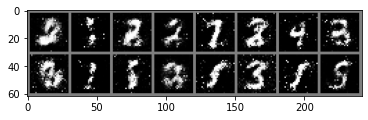

(epoch 100/200) p_real: 0.630706, p_g: 0.158255


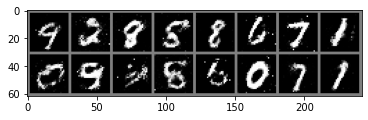

(epoch 150/200) p_real: 0.663386, p_g: 0.300351


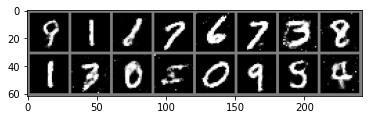

(epoch 200/200) p_real: 0.599043, p_g: 0.314559


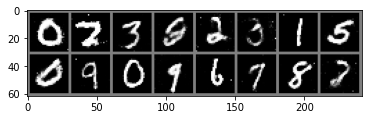

In [ ]:
p_real_trace = []
p_fake_trace = []


for epoch in range(200):

    run_epoch(generator, discriminator, optimizer_G, optimizer_D)
    p_real, p_fake = evaluate_model(generator, discriminator)
    p_real_trace.append(p_real)
    p_fake_trace.append(p_fake)
    if((epoch+1)% 50 == 0):
        print('(epoch %i/200) p_real: %f, p_g: %f' % (epoch+1, p_real, p_fake))
        imshow_grid(generator(sample_z(16)).view(-1, 1, 28, 28))

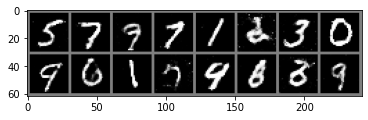

In [ ]:
# 가짜 이미지 생성하기
with torch.no_grad():
  generator.eval()
  imshow_grid(generator(sample_z(16)).view(-1, 1, 28, 28))
# 이미지 출력하기



간단한 모델인 것을 감안했을때 매우 준수한 성능이다. 육안으로도 많은 숫자들을 구별할 수 있다.

이제 훈련된 생성 모델이 인공지능도 분류할 수 있을만큼 정확한 가짜 사진을 생성하는지 확인해보자.
<br><br>
먼저 MNIST 분류 모델을 간단하게 만들자.

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()

    self.model = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128,200),
        nn.ReLU(),
        nn.Linear(200,10),
        nn.Tanh()
    )

  def forward(self,x):
    out = self.model(x)
    return out


model = Model().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
  model.train()

  for batch_idx,(img,label) in enumerate(train_data_loader):
    img, label = img.to(device), label.to(device)

    optimizer.zero_grad()

    output = model(img.view(-1,28*28))
    loss = criterion(output, label)

    loss.backward()
    optimizer.step()

  
  print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
      epoch, batch_idx * len(img), len(train_data_loader.dataset),
      100. * batch_idx / len(train_data_loader), loss.item()))



    

Train Epoch: 0 [59800/60000 (100%)]	Loss: 1.512022
Train Epoch: 1 [59800/60000 (100%)]	Loss: 1.252890
Train Epoch: 2 [59800/60000 (100%)]	Loss: 1.164337
Train Epoch: 3 [59800/60000 (100%)]	Loss: 1.116447
Train Epoch: 4 [59800/60000 (100%)]	Loss: 1.109630
Train Epoch: 5 [59800/60000 (100%)]	Loss: 1.026571
Train Epoch: 6 [59800/60000 (100%)]	Loss: 1.021027
Train Epoch: 7 [59800/60000 (100%)]	Loss: 0.981698
Train Epoch: 8 [59800/60000 (100%)]	Loss: 0.998707
Train Epoch: 9 [59800/60000 (100%)]	Loss: 0.985272


In [ ]:
model.eval()
test_loss = 0
correct = 0
criterion =  nn.CrossEntropyLoss(reduction='sum') #add all samples in a mini-batch
with torch.no_grad():
    for data, target in test_data_loader:
        data, target = data.to(device), target.to(device)
        output = model(data.view(-1,28*28))
        loss = criterion(output, target)
        test_loss +=  loss.item()
        pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_data_loader.dataset)

print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_data_loader.dataset),
    100. * correct / len(test_data_loader.dataset)))


Test set: Average loss: 0.9952, Accuracy: 9110/10000 (91%)



이제 생성자가 만든 사진을 MNIST에 넣어보자.


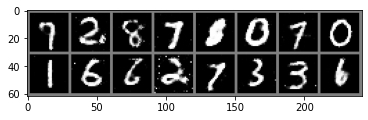

[7, 2, 8, 7, 8, 0, 7, 0]
[1, 6, 6, 2, 7, 3, 3, 6]


In [ ]:
torch.no_grad()
generator.eval()
model.eval()

z = torch.randn(batch_size, 100).to(device)
output = generator(z)

label_list = []

for img in output[:16]:
  label = model(img.view(-1,28*28))
  label_list.append(label.argmax().item())

imshow_grid(output[:16].view(-1, 1, 28, 28))
print(label_list[:8])
print(label_list[8:])

생각보다 인공지능이 잘 분류해 내는 것을 확인할 수 있다.
<br>
<br>
GAN은 이미 연구가 많이 이루어져 정말 정교한 수준의 작업을 수행할 수 있는 모델들이 많이 준비되어있다. 정말 매우 흥미로운 분야 중 하나이므로 꼭 더 찾아보고 관련 프로젝트를 해보는 것을 추천한다.